In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
print(tf.__version__)

2.8.0


In [10]:
observations=1000
xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(-10,10,(observations,1))

generated_inputs= np.column_stack((xs,zs))


noise=np.random.uniform(-1,1,(observations,1))
generated_targets= 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [11]:
training_data= np.load('TF_intro.npz')

In [22]:
input_size=2
output_size=1

model=tf.keras.Sequential([tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                         bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                )
                          ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 26.9847
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2300
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4357
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3876
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3947
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3830
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3724
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3646
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4098
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3747
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3674
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3698
Epoch 13/100
32/32 [================

In [23]:
##Extract the weights and Bias


In [24]:
model.layers[0].get_weights()

[array([[ 2.0662484],
        [-3.062312 ]], dtype=float32),
 array([4.9883113], dtype=float32)]

In [25]:
weights= model.layers[0].get_weights()[0]
weights

array([[ 2.0662484],
       [-3.062312 ]], dtype=float32)

In [26]:
bias= model.layers[0].get_weights()[1]
bias

array([4.9883113], dtype=float32)

In [27]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 32.4],
       [ 40.1],
       [ 42.3],
       [-29.9],
       [ -0. ],
       [  6.4],
       [-16.5],
       [ 48.2],
       [ 40.5],
       [ 11.2],
       [ 21.7],
       [-17.1],
       [ 20.6],
       [ 25.8],
       [  4.1],
       [ 22.7],
       [-27.7],
       [ 23.7],
       [-12. ],
       [ 38.5],
       [ 37.8],
       [ 10.4],
       [-15.5],
       [ -4.1],
       [ 21.3],
       [ 10.4],
       [ 17.3],
       [ 19.9],
       [-24.2],
       [  5.9],
       [ -5. ],
       [ 27.1],
       [ -4.5],
       [  1. ],
       [ 42.2],
       [  2. ],
       [ -0.5],
       [ -2.4],
       [ 33.8],
       [ -2.7],
       [ -4.3],
       [ 20.6],
       [ 15.7],
       [ 13.8],
       [-33.1],
       [ 34.5],
       [ -1.7],
       [-23.4],
       [  3.5],
       [ 19.6],
       [  5.9],
       [ 19. ],
       [  5.5],
       [ 15.9],
       [  8. ],
       [ 38.9],
       [  9.1],
       [ -5.9],
       [ 11.9],
       [ -1.4],
       [-26.6],
       [-20.7],
       [

In [28]:
##Plot the data

<function matplotlib.pyplot.show(close=None, block=None)>

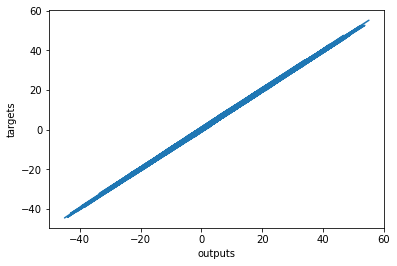

In [21]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show